<a href="https://colab.research.google.com/github/theorignalmapdcodex/aipi590_i-4_et2/blob/main/notebooks/pdp%2Bice%2Bale_plot_interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

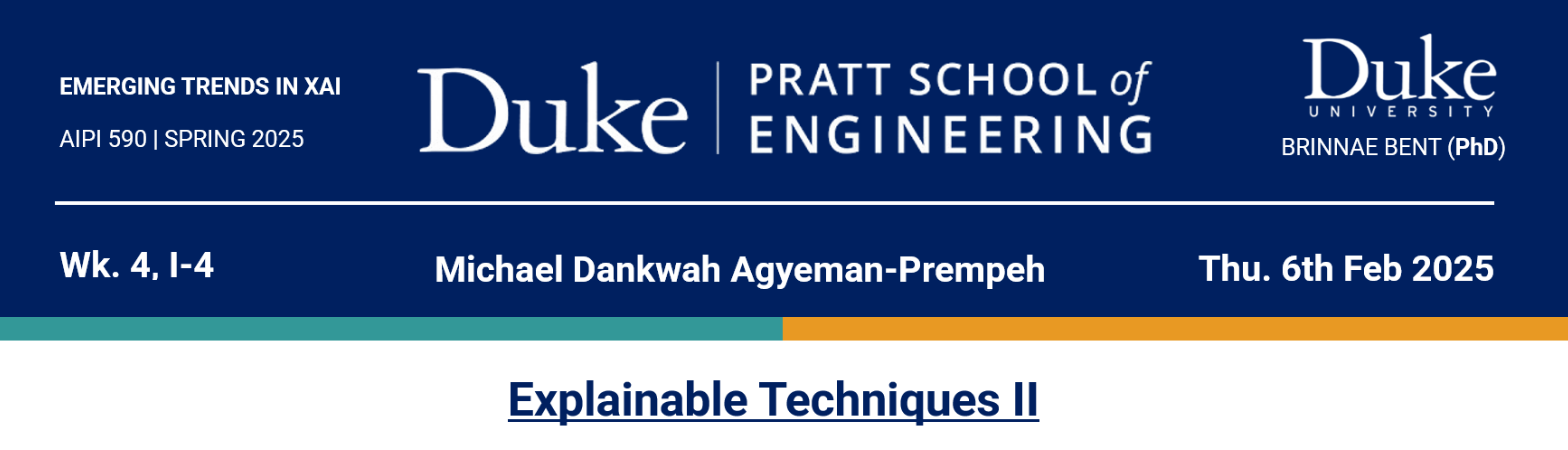

In [44]:
# Connecting my Google drive to Colab and importing dataset just for running; Include in Colab after work completion (mounting is unique per device running this code)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


>#### 🔗 **1. GitHub Link:**
- Click [here](https://github.com/theorignalmapdcodex/aipi590_i-4_et2/blob/main/notebooks/pdp%2Bice%2Bale_plot_interpretation.ipynb) to access the *GitHub repository .ipynb* file for this assignment.

## 🥅 **Project Goal:**
### *The goal of this assignment is to gain a deep understanding of explainable AI (XAI) techniques, specifically focusing on Partial Dependence Plots (PDP), Individual Conditional Expectation (ICE) plots, and Accumulated Local Effects (ALE) plots.*

<br>

--------------------------------------------------------------------------------

In [45]:
# To ignore warnings for code output to look clean
import warnings
warnings.filterwarnings("ignore")

In [46]:
# import os

# # Remove Colab default sample_data
# !rm -r ./sample_data

# # Clone GitHub files to colab workspace
# repo_name = "aipi590_i-4_et2"
# git_path = 'https://github.com/theorignalmapdcodex/aipi590_i-4_et2.git' # Change to your path
# !git clone "{git_path}"

# # Change working directory to location of notebook
# notebook_dir = 'notebooks'
# path_to_notebook = os.path.join(repo_name,notebook_dir)
# %cd "{path_to_notebook}"
# %ls

# import os

# # Remove Colab default sample_data if it exists
# if os.path.exists("./sample_data"):
#     !rm -r ./sample_data

# # Clone GitHub files to colab workspace
# repo_name = f'{aipi590_i-4_et2}'

# # Check if the repo already exists
# if not os.path.exists("/content/" + repo_name):
#     git_path = f'{https://github.com/theorignalmapdcodex/aipi590_i-4_et2.git}'
#     !git clone "{git_path}"
# else:
#     print(f"{aipi590_i-4_et2} already exists.")

# # Change working directory to location of notebook
# path_to_notebook = os.path.join("/content/" + aipi590_i-4_et2)
# %cd "{path_to_notebook}"
# %ls

# #Install the requirements for this package
# !pip install -r requirements.txt

## 📚 **I. Libraries & Packages Installation**

In [47]:
# For the purposes of working on Colab independently
!pip install numpy==1.25.2 pandas==2.0.3 scikit-learn==1.2.2 shap==0.45.1 imbalanced-learn
!pip install git+https://github.com/MaximeJumelle/ALEPython.git@dev#egg=alepython

  Cloning https://github.com/MaximeJumelle/ALEPython.git (to revision dev) to /tmp/pip-install-6dmtpg4w/alepython_36092a7fdcfc439498573a1e50f7c0cd
  Running command git clone --filter=blob:none --quiet https://github.com/MaximeJumelle/ALEPython.git /tmp/pip-install-6dmtpg4w/alepython_36092a7fdcfc439498573a1e50f7c0cd
  Resolved https://github.com/MaximeJumelle/ALEPython.git to commit 286350ab674980a32270db2a0b5ccca1380312a7
  Preparing metadata (setup.py) ... done


In [48]:
# #Install the requirements for this package and included in requirements.txt file
# !pip install -r requirements.txt

In [49]:
# General packages for EDA, Plotting etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for Machine Learning purposes
import xgboost
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Packages for evaluating my choice of model
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

# Packages from last assignment
import shap

# Packages from XAI course
import shap
from alepython import ale_plot
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import permutation_importance

## ⚙️ **III. Assessing, Cleaning and Exploratory Data Analysis on Chosen Dataset**

In [50]:
# i. Sourcing the Bull City streaming data
# Bull City Streaming Data - The data presented examines three treatments of tile artwork for the video and short streaming service, “Bull City Streaming.”
# https://drive.google.com/file/d/1RQNT9uWaEwn0rxkRPVVcVPM_S2MLgJtA/view

bcs_data = pd.read_csv('/content/drive/MyDrive/MEngDTI@Duke/DTK530/I-5/ABtest&CAdata/I-5_Data_v2.csv')

# No of rows
bcs_data_rows = bcs_data.shape[0]
# No of columns
bcs_data_columns = bcs_data.shape[1]
# Get the values
print(bcs_data_rows,'\n',bcs_data_columns)

# Showing first 10 rows of table
bcs_data.info()
bcs_data.describe()
bcs_data.head(10)

21000 
 10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   User ID                21000 non-null  int64  
 1   Geographical Region    21000 non-null  object 
 2   Treatment              21000 non-null  object 
 3   Engagement Time (min)  21000 non-null  int64  
 4   Views                  21000 non-null  int64  
 5   Likes                  21000 non-null  int64  
 6   Shares                 21000 non-null  int64  
 7   Completion Rate (%)    8487 non-null   float64
 8   Conversion             21000 non-null  bool   
 9   Date                   21000 non-null  object 
dtypes: bool(1), float64(1), int64(5), object(3)
memory usage: 1.5+ MB


,User ID,Geographical Region,Treatment,Engagement Time (min),Views,Likes,Shares,Completion Rate (%),Conversion,Date
0,162320,Europe,B,43,8,5,1,NaN,False,7/2/2019
1,162320,Europe,B,49,8,3,2,NaN,False,7/2/2019
2,57447,Africa,Control,19,1,0,0,NaN,False,7/2/2019
3,57447,Africa,Control,129,2,2,3,28.287122,True,7/3/2019
4,57447,Africa,Control,39,5,5,3,NaN,False,7/6/2019
5,57447,Africa,Control,191,9,6,0,2.812509,True,7/4/2019
6,57447,Africa,Control,171,6,0,1,93.756664,True,7/6/2019
7,57447,Africa,Control,160,3,1,0,NaN,False,7/4/2019
8,57447,Africa,Control,128,7,7,3,99.705033,True,7/2/2019
9,57447,Africa,Control,199,6,6,3,44.729176,True,7/3/2019


In [51]:
# ii - Task 1: Dropping the Treatment and UserID columns as I won't be performing any form of Cohort Analyis and even the Geographical Region and Date columns as working with fully numerical values would be ideal
bcs_data = bcs_data.drop(columns=['User ID','Treatment', 'Geographical Region', 'Date'])

In [52]:
# ii - Task 2: Checking for null values for all columns
print(bcs_data.isnull().sum())

Engagement Time (min)        0
Views                        0
Likes                        0
Shares                       0
Completion Rate (%)      12513
Conversion                   0
dtype: int64


From the dataframe description and checking for null value function above, we see that `Completion Rate (%)`, a very important feature which will be included in the x variables for buidling my model of choice, has a lot of `null values`(12,513) and hence how we treat this column is crucial.

From my analysis, it will be better if I <mark>fill missing values with the mean or median of the existing values (they are numerical values)</mark> rather than dropping the rows as I believe it contributes to the prediction of the `Conversion` feature (the feature I will select as my target (y) variable).

In [53]:
# ii - Task 3: Filling the empty table cells with mean values in the Completion Rate (%) column of bcs_data with mean values with the aim of protecting the power of our model yet to be built

bcs_data['Completion Rate (%)'].fillna(bcs_data['Completion Rate (%)'].mean(), inplace=True)                        #----> Search via Gemini AI @ 8:19pm

In [54]:
# Showing first 10 rows of table again
bcs_data.info()
bcs_data.describe()
bcs_data.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Engagement Time (min)  21000 non-null  int64  
 1   Views                  21000 non-null  int64  
 2   Likes                  21000 non-null  int64  
 3   Shares                 21000 non-null  int64  
 4   Completion Rate (%)    21000 non-null  float64
 5   Conversion             21000 non-null  bool   
dtypes: bool(1), float64(1), int64(4)
memory usage: 840.9 KB


,Engagement Time (min),Views,Likes,Shares,Completion Rate (%),Conversion
0,43,8,5,1,49.816287,False
1,49,8,3,2,49.816287,False
2,19,1,0,0,49.816287,False
3,129,2,2,3,28.287122,True
4,39,5,5,3,49.816287,False
5,191,9,6,0,2.812509,True
6,171,6,0,1,93.756664,True
7,160,3,1,0,49.816287,False
8,128,7,7,3,99.705033,True
9,199,6,6,3,44.729176,True


Now, there are no `null` values in our dataframe and from the description.

And also, the class distribution of our target variable is fair so, we're good to go.

Yay! 🎊

## 💻 **IV. Correlation Between Features/Variables**

Before we build the model and even start plotting, we need to:
- Check for the correlation between features (two see if two things are connected, that is, as one ⬆️ or ⬇️, what happens to the other). The `Conversion` column is already in boolean format so our correlation matrix will be easy to build (no need for one-hot encoding)
- Select a dependent (target) variable (y) and the rest as independent variables (x)

**a. To check for correlation between features, we can use a correlation matrix**

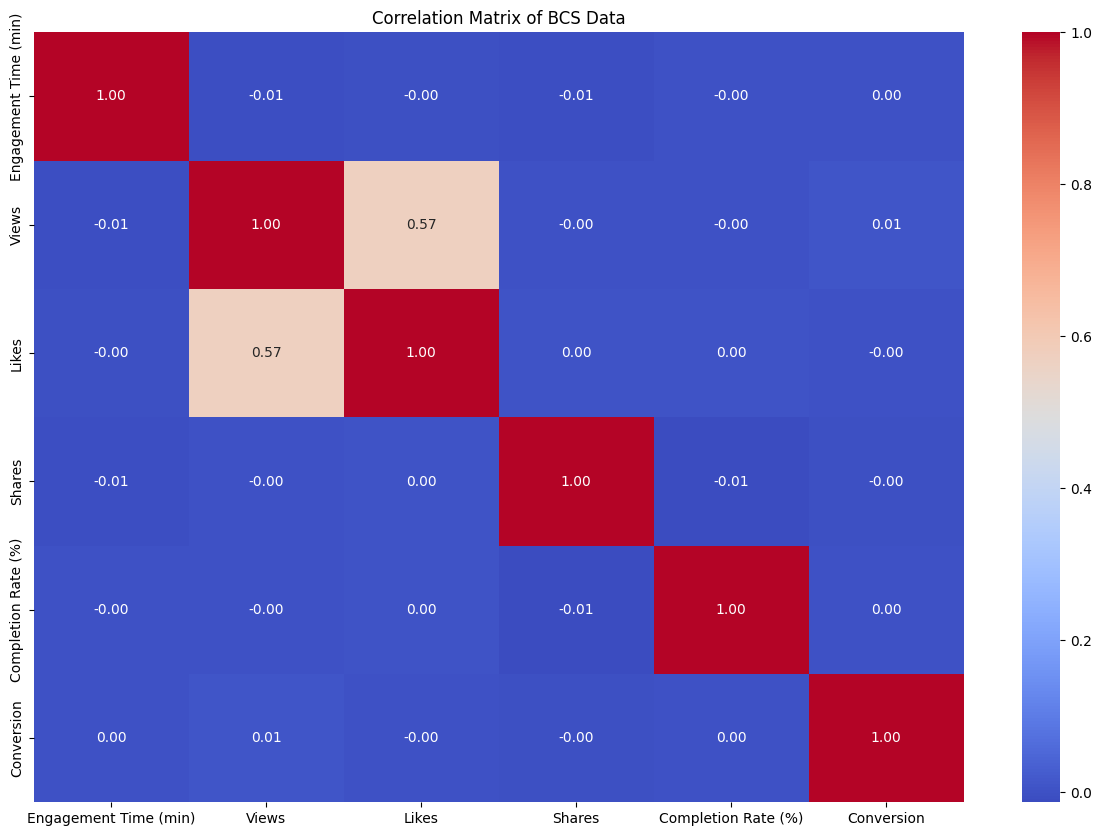

In [55]:
# Creating and visualizing the correlation matrix
correlation_matrix = bcs_data.corr()                                                    #----> via Gemini AI @ 8:35pm

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of BCS Data')

plt.show()

In [56]:
# Identifying highly correlated elements by code                                                  #----> via Gemini AI @ 9:19pm but refined by personally introducing 'if clause'
# Threshold for considering features as highly correlated
threshold = 0.8

# Finding pairs of features with correlation above the threshold
corr_pairs = correlation_matrix.abs().unstack().sort_values(kind="quicksort", ascending=False)

highly_correlated = corr_pairs[(corr_pairs < 1) & (corr_pairs >= threshold)]

if highly_correlated.empty:
    print("No highly correlated features found.")
else:
    print("Highly correlated feature pairs:")
    print(highly_correlated)

No highly correlated features found.


**Interpretation:**
- Since from the analysis above, we have no highly correlated features, it basically means the features are not highly redundant and might be contributing something unique.

It would be nice to see how important these features are after model training.

## ✨ **V. Training and Building the Random Forest Model After Oversampling**

> I will go on to select my target variable, `Conversion` and the other x variables but before that, let's check to make sure there's no `class imbalance`

Class Distribution of 'Conversion':
Conversion
False    12513
True      8487
Name: count, dtype: int64


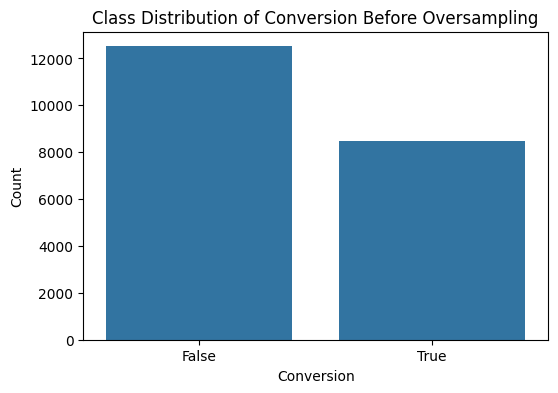

In [57]:
# Checking for class imbalance in 'Conversion' column of bcs data
# Class distribution of the target variable 'Conversion'
class_distribution = bcs_data['Conversion'].value_counts()                                  #---- > Code developed by me

print("Class Distribution of 'Conversion':")
print(class_distribution)

# Plotting the class distribution                                                           #----> via Gemini AI @ 10:30PM
plt.figure(figsize=(6, 4))
sns.countplot(data=bcs_data, x='Conversion')
plt.title('Class Distribution of Conversion Before Oversampling')
plt.xlabel('Conversion')
plt.ylabel('Count')
plt.show()

From the above, we see there's the presence of `class imbalance` (~8500 Trues and ~12,500 Falses). To cater for this, we can perform `oversampling using SMOTE (Synthetic Minority Over-sampling Technique)`.

But before we proceed to do that, let's see how the model will perform before we `oversample`.

   Engagement Time (min)  Views  Likes  Shares  Completion Rate (%)
0                     43      8      5       1            49.816287
1                     49      8      3       2            49.816287
2                     19      1      0       0            49.816287
3                    129      2      2       3            28.287122
4                     39      5      5       3            49.816287
0    False
1    False
2    False
3     True
4    False
Name: Conversion, dtype: bool
Random Forest Performance (Before Oversampling):
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2503
        True       1.00      1.00      1.00      1697

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200



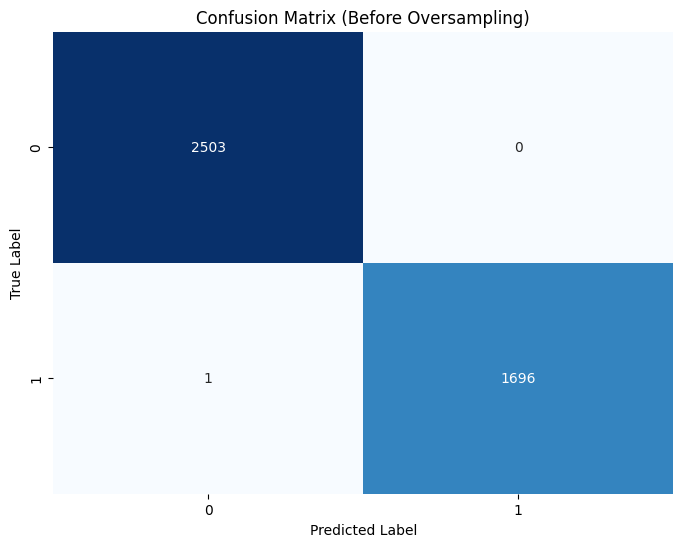

In [58]:
# 3. Splitting bcs_data into X and Y for model training BEFORE oversampling!)
target_feature = 'Conversion'

Y = bcs_data[target_feature]
X = bcs_data.drop(target_feature, axis=1)

print(X.head())
print(Y.head())


# 4. Train a Random Forest (Before Oversampling)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y) # Stratify important!

rf_before = RandomForestClassifier(random_state=42)
rf_before.fit(X_train, Y_train)
Y_pred_before = rf_before.predict(X_test)

print("Random Forest Performance (Before Oversampling):")
print(classification_report(Y_test, Y_pred_before))
cm_before = confusion_matrix(Y_test, Y_pred_before)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_before, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (Before Oversampling)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### Now, let's proceed to `'smote'` our data!


Class counts after oversampling:  Conversion
False    10010
True     10010
Name: count, dtype: int64


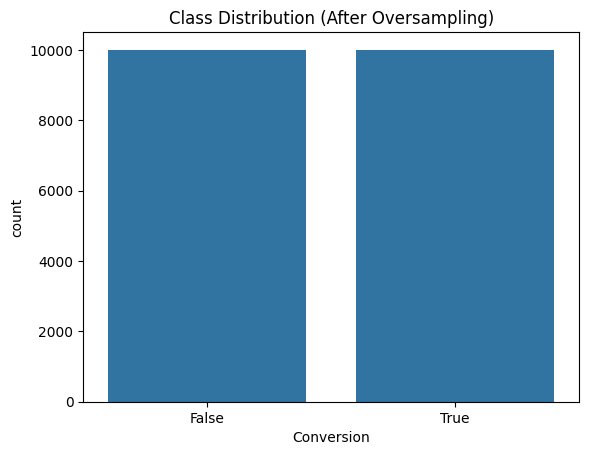

In [59]:
# Applying SMOTE Oversampling                                                                               #----> via Gemini AI @ 10:36pm (All of the SMOTE code)
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

print("\nClass counts after oversampling: ", pd.Series(Y_train_resampled).value_counts())

sns.countplot(x=Y_train_resampled)
plt.title('Class Distribution (After Oversampling)')
plt.show()

### Now we can use `X_train_resampled` and `Y_train_resampled` for training the model


Random Forest Performance After Oversampling:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2503
        True       1.00      1.00      1.00      1697

    accuracy                           1.00      4200
   macro avg       1.00      1.00      1.00      4200
weighted avg       1.00      1.00      1.00      4200



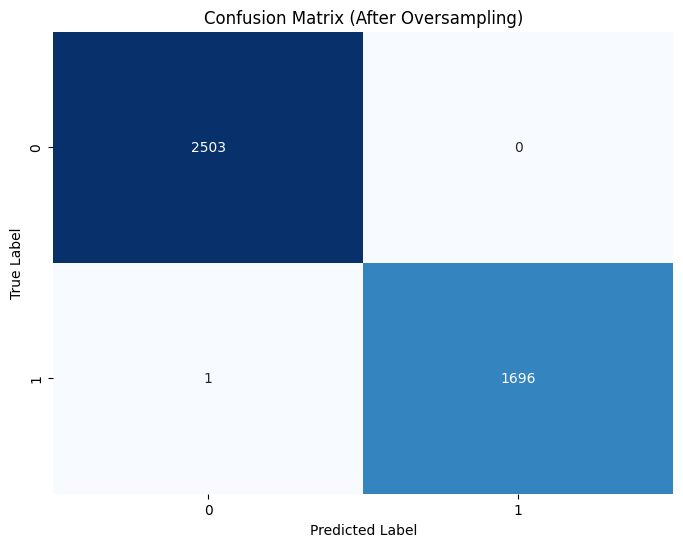

In [60]:
# Training the Random Forest Model After Oversampling
rf_after = RandomForestClassifier(random_state=42)
rf_after.fit(X_train_resampled, Y_train_resampled)
Y_pred_after = rf_after.predict(X_test)

print("\nRandom Forest Performance After Oversampling:")
print(classification_report(Y_test, Y_pred_after))
cm_after = confusion_matrix(Y_test, Y_pred_after)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_after, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix (After Oversampling)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

### **<mark>Extras</mark>**

In [61]:
# # Verifying the class distribution after oversampling                                                                                       #---- > Print code developed by me
# print("Class distribution before oversampling:", Y.value_counts(), "\n\n", "--------------------------------------------------", "\n")
# print("Class distribution after oversampling:", Y_new_os.value_counts())

In [62]:
# # Let's run plot a correlation matrix again to see what has changed
# new_bcs_data = pd.concat([X_new_os, Y_new_os], axis=1)

# corr_matrix = new_bcs_data.corr()

# # Visualizing the correlation matrix
# plt.figure(figsize=(15,10))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix after Oversampling')
# plt.show()

From the above chart, not much has changed from our initial correlation matrix. However, we can see a `0.57` to `0.58` changed between the `Likes` and `Views` features.

### Let's check which features are important and with that information, we can proceed to plotting our PDP, ICE and ALE plots.

In [63]:
# Accessing feature importances
print("Feature Importances (After Oversampling):", rf_after.feature_importances_)

Feature Importances (After Oversampling): [0.00482743 0.00163317 0.00179951 0.0028722  0.98886769]


## 🅿️ **VI. The Plots**

> ## **📈 Plot #1: Partial Dependence Plots (PDP)**  

> ## **📉 Plot #2: Individual Conditional Expectation Plots (ICE)**  

> ## **📊 Plot #3: Accumulated Local Effects Plots (ALE)**  

--------------------------------------------------------------------------------

## 🔚 **Conclusion:**

- ### *Interesting Findings:*
Text goes here

- ### *Differences Between PDP and ALE Plots:*
Text goes here.

- ### *Commenting on Correlation Matrix and Impact on Plot Results:*
Text goes here.